In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import sqlite3

In [16]:
df = pd.read_csv('Asset/data.csv', encoding='latin1')
abusive = pd.read_csv('Asset/abusive.csv', encoding='utf-8')
new_kamusalay = pd.read_csv('Asset/new_kamusalay.csv', encoding='latin1')

In [18]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [5]:
new_kamusalay

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [6]:
for k,v in df.isnull().sum().items():
    print(k,v)

Tweet 0
HS 0
Abusive 0
HS_Individual 0
HS_Group 0
HS_Religion 0
HS_Race 0
HS_Physical 0
HS_Gender 0
HS_Other 0
HS_Weak 0
HS_Moderate 0
HS_Strong 0


Membuat Visual untuk Reporting

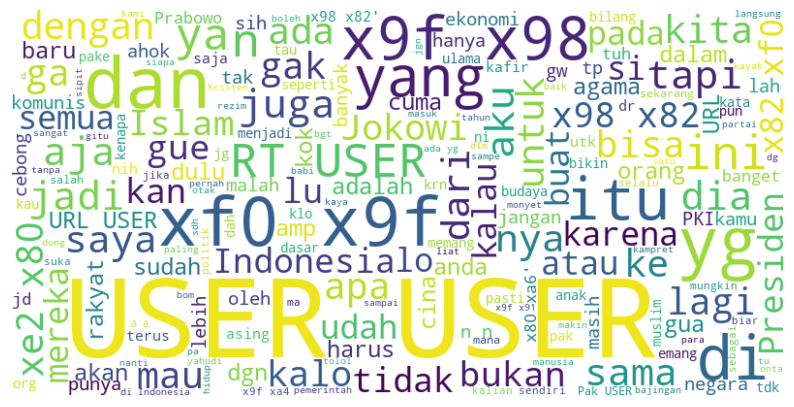

<Figure size 640x480 with 0 Axes>

In [8]:

# Menggabungkan semua teks dari kolom "Tweet" menjadi satu string
all_text = ' '.join(df['Tweet'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png')

In [13]:
# Membuat koneksi ke database
conn = sqlite3.connect('database.db')

# Membaca data dari tabel tertentu ke DataFrame
query = "SELECT previous_tweet, cleaned_new_tweet FROM tweet_cleaning"
df = pd.read_sql_query(query, conn)

df['previous_tweet'] = df['previous_tweet'].apply(lambda x: x.decode('utf-8'))
df['cleaned_new_tweet'] = df['cleaned_new_tweet'].apply(lambda x: x.decode('utf-8'))

# Menutup koneksi
conn.close()

# Melihat isi DataFrame
print(df.head())

                                      previous_tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   

                                   cleaned_new_tweet  
0  di saat semua cowok berusaha melacak perhatian...  
1  siapa yang telat memberi tau eluedan gue berga...  
2  41 kadang aku berpikir kenapa aku tetap percay...  
3  aku itu akunnku tau matamu tapi dilihat dari m...  
4  kaum kafir sudah kelihatan dongoknya dari awal...  


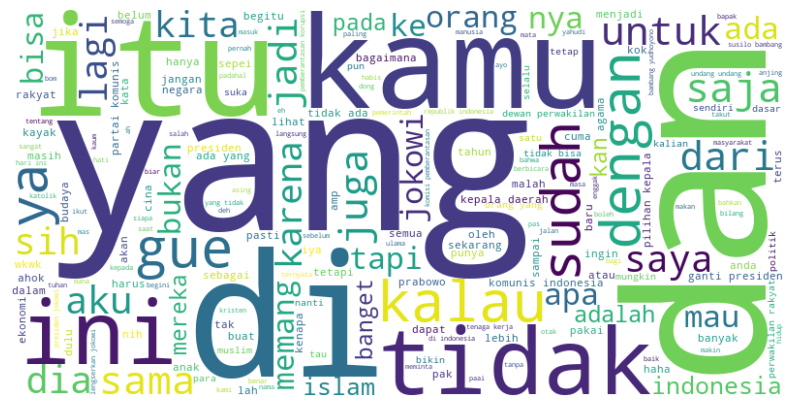

<Figure size 640x480 with 0 Axes>

In [15]:

# Menggabungkan semua teks dari kolom "Tweet" menjadi satu string
all_text = ' '.join(df['cleaned_new_tweet'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloudclean.png')

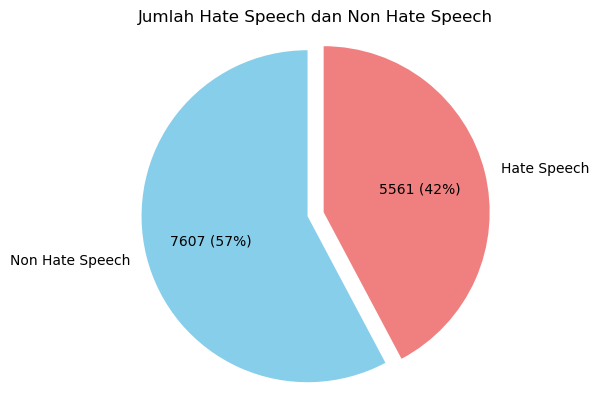

In [39]:
# Membuat plot pie chart
labels = ['Non Hate Speech', 'Hate Speech']
sizes = hs_counts.values
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # memberikan efek exploded pada slice hate speech
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda p: f'{int(p * sum(sizes) / 100)} ({int(p)}%)', startangle=90)

# Mengatur aspek proporsional agar pie chart menjadi lingkaran
plt.axis('equal')

# Menambahkan judul pie chart
plt.title('Jumlah Hate Speech dan Non Hate Speech')

# Menampilkan pie chart dengan angka jumlah dan persentase
plt.show()


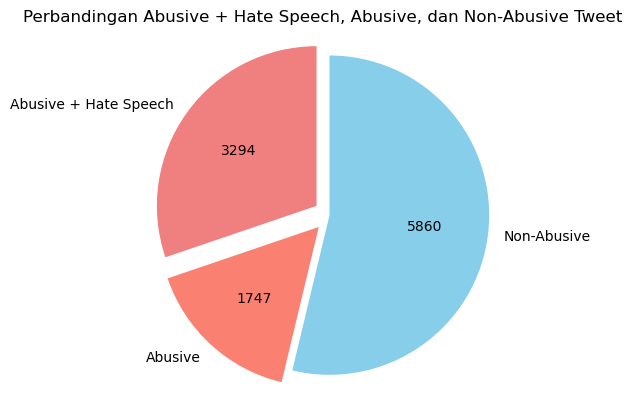

In [38]:
# Menghitung jumlah abusive dan non-abusive tweet berdasarkan kondisi
abusive_hs_counts = df[(df['Abusive'] == 1) & (df['HS'] == 1)].shape[0]
abusive_counts = df[(df['Abusive'] == 1) & (df['HS'] == 0)].shape[0]
non_abusive_counts = df[(df['Abusive'] == 0) & (df['HS'] == 0)].shape[0]

# Membuat plot pie chart
labels = ['Abusive + Hate Speech', 'Abusive', 'Non-Abusive']
sizes = [abusive_hs_counts, abusive_counts, non_abusive_counts]
colors = ['lightcoral', 'salmon', 'skyblue']
explode = (0.1, 0.1, 0)  # memberikan efek exploded pada slice abusive and hate speech dan abusive
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda p: f'{int(p * sum(sizes) / 100)}', startangle=90)

# Mengatur aspek proporsional agar pie chart menjadi lingkaran
plt.axis('equal')

# Menambahkan judul pie chart
plt.title('Perbandingan Abusive + Hate Speech, Abusive, dan Non-Abusive Tweet')

# Menampilkan pie chart
plt.show()

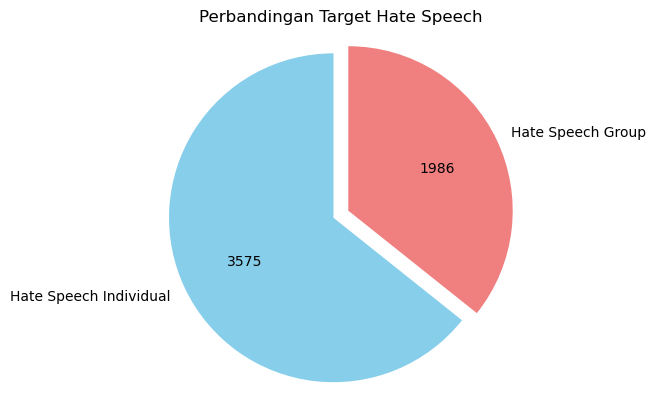

In [27]:
# Menghitung jumlah abusive dan non-abusive tweet berdasarkan kondisi
abusive_hs_counts = df[(df['Abusive'] == 1) & (df['HS'] == 1)].shape[0]
abusive_counts = df[(df['Abusive'] == 1) & (df['HS'] == 0)].shape[0]
non_abusive_counts = df[(df['Abusive'] == 0) & (df['HS'] == 0)].shape[0]

# Membuat plot pie chart
labels = ['Abusive and Hate Speech', 'Abusive', 'Non-Abusive']
sizes = [abusive_hs_counts, abusive_counts, non_abusive_counts]
colors = ['lightcoral', 'salmon', 'skyblue']
explode = (0.1, 0.1, 0)  # memberikan efek exploded pada slice abusive and hate speech dan abusive
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)

# Mengatur aspek proporsional agar pie chart menjadi lingkaran
plt.axis('equal')

# Menambahkan judul pie chart
plt.title('Perbandingan Abusive and Hate Speech, Abusive, dan Non-Abusive Tweet')

# Menampilkan pie chart
plt.show()

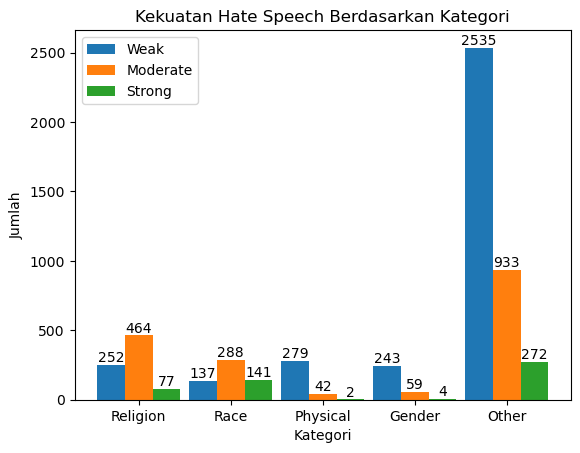

In [36]:
# Menghitung jumlah hate speech dengan nilai weak, moderate, dan strong untuk setiap kategori
categories = ['Religion', 'Race', 'Physical', 'Gender', 'Other']
weak_counts = [df[df['HS_Weak'] == 1][f'HS_{category}'].sum() for category in categories]
moderate_counts = [df[df['HS_Moderate'] == 1][f'HS_{category}'].sum() for category in categories]
strong_counts = [df[df['HS_Strong'] == 1][f'HS_{category}'].sum() for category in categories]

# Mengatur posisi grup bar chart
bar_width = 0.3
index = range(len(categories))

# Membuat plot bar chart
plt.bar(index, weak_counts, width=bar_width, label='Weak')
plt.bar([i + bar_width for i in index], moderate_counts, width=bar_width, label='Moderate')
plt.bar([i + (2 * bar_width) for i in index], strong_counts, width=bar_width, label='Strong')

# Mengatur label sumbu x
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks([i + bar_width for i in index], categories)

# Menambahkan angka di atas setiap bar
for i in index:
    plt.text(i, weak_counts[i], str(weak_counts[i]), ha='center', va='bottom')
    plt.text(i + bar_width, moderate_counts[i], str(moderate_counts[i]), ha='center', va='bottom')
    plt.text(i + (2 * bar_width), strong_counts[i], str(strong_counts[i]), ha='center', va='bottom')

# Menambahkan legend
plt.legend()

# Menambahkan judul diagram
plt.title('Kekuatan Hate Speech Berdasarkan Kategori')

# Menampilkan diagram batang
plt.show()

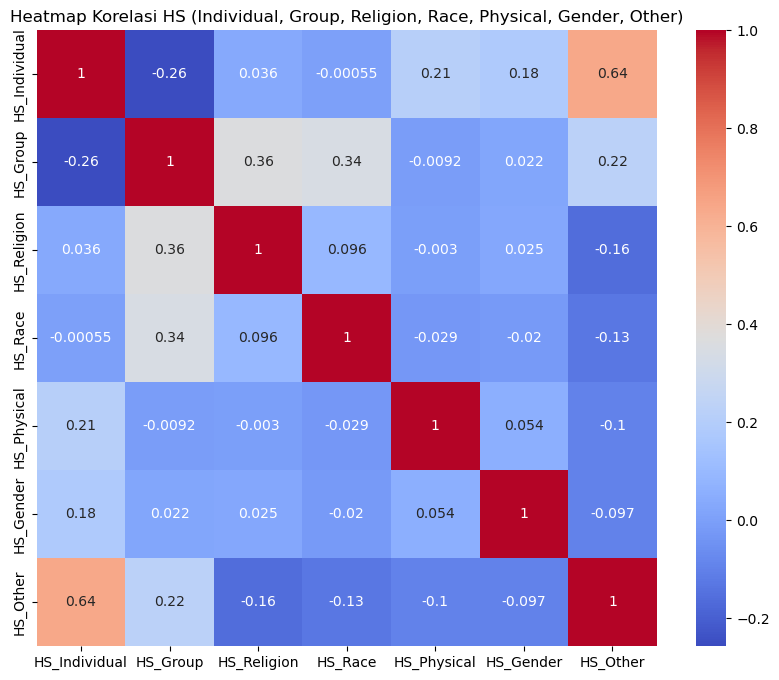

In [34]:
# Mengambil subset kolom yang diperlukan
columns = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
subset_df = df[columns]

# Menghitung matriks korelasi antar kolom
corr_matrix = subset_df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Menambahkan judul heatmap
plt.title('Heatmap Korelasi HS (Individual, Group, Religion, Race, Physical, Gender, Other)')

# Menampilkan heatmap
plt.show()